**Notes**:
* Feel free to add cells as you need them.
* Keep your code clean and readable.
* Comments included in this document are just to summarize the question. For full details make sure you read the assignment pdf thoroughly.
* Don't forget to rename the file when you finish

# EECS 461/ECE 523  | Assignment 3

Note: In the preprocess part, the code piece related to the preprocess that is provided with "Assignment 1 Solutions" is used for simplicity sake.

In [1]:
#importing the required libraries for the assignment

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('training.csv')#read the datasets and prepare them such as dropping price column from training dataset.
train_x_a = train_df.drop('price', axis=1)#drop price from train dataset
train_y = train_df['price'] #only the price column

In [3]:
nan_columns = list(train_df.columns[train_df.isna().any()]) #Null Columns

train_x_a_median = train_x_a.median() #Store as variable to fill test data later

train_x_b = train_x_a.fillna(train_x_a_median)# fill null values

In [4]:
price_null_index = train_y[train_y.isnull()].index #all null rows under the price column are dropped from train/train y target dataset.
train_x_b.drop(price_null_index, inplace=True)
train_y.drop(price_null_index, inplace=True)

In [5]:
categorical_columns = list(train_x_b.columns[train_x_b.dtypes == 'object'])#we get the categorical columns

In [6]:
train_x_d = pd.get_dummies(train_x_b) #implements one hot encoding to last train dataframe,-train x b

In [7]:
#here we scale our train datasetand use the same scaler to scale the test dataset
continuous_columns = [i for i in train_x_b if i not in categorical_columns]

sc = StandardScaler()
sc.fit(train_x_d[continuous_columns])# we only fit the scaler, not fit_transform so that we can use the same scaler for the test data.
train_x_e = train_x_d.copy()
train_x_e[continuous_columns] = sc.transform(train_x_d[continuous_columns])

In [8]:
train_x_e.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,1.040486,1.218356,0.697865,1.106358,-0.204044,0.427546,-0.000506,-0.298040,-0.115772,0.312992,...,0,0,0,0,0,0,0,0,1,0
1,-0.729389,-0.266100,-1.003614,-0.087277,-0.969288,-0.679464,-0.628165,0.134277,-0.142667,-0.909358,...,0,0,0,0,1,0,0,0,0,0


In [9]:
test_df = pd.read_csv('test.csv') # same steps for preprocessing test dataset.

test_x = test_df.drop('price', axis=1)#drop the price column
test_y = test_df['price']#only price column

In [10]:
test_x.fillna(train_x_a_median, inplace=True) #Use train median to fill test data

test_null_index = test_y.index[test_y.isnull()]
test_x.drop(test_null_index, inplace=True) #fill the null values in the test dataset
test_y.drop(test_null_index, inplace=True)

In [11]:
test_x = pd.get_dummies(test_x)#implement one hot encoding to test data

In [12]:
#Scaling
test_x[continuous_columns] = sc.transform(test_x[continuous_columns])# we use already fitted standard scaler sc from training data.

In [13]:
test_x.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,1.311385,1.529613,2.799691,0.885315,0.874435,0.301750,-0.471250,0.473955,-0.384726,0.204338,...,0,0,0,0,0,0,0,0,1,0
1,-0.368190,0.148909,-1.654180,0.177976,-0.279379,-0.352393,-0.628165,1.029791,-0.250249,-0.447582,...,0,0,0,1,0,0,0,0,0,0


In [14]:
#split whole train dataset into train and validation sets with the ration of 80/20.
X_train, X_val, y_train, y_val = train_test_split(train_x_e, train_y, test_size=0.2, random_state=0)

## KNN REGGRESSOR TO PREDICT CAR PRICES 

### a) Training Vs Validation Plot:

In [15]:
train_split_x = X_train #splitted results as train and validation sets.
train_split_y = y_train
val_split_x = X_val
val_split_y = y_val

In [16]:
knn_training_errors = []#at each iteration, the param. k is updated and increased by one to get various knn results and select the best one.
knn_validation_error = []# and save the train validation errors.

for k in range(1,30):
        neigh = KNeighborsRegressor(n_neighbors=k)#knn classifier
        neigh.fit(train_split_x , train_split_y) #fitting the splitted train data
        train_predictions = neigh.predict(train_split_x)#train predictions
        valid_predictions = neigh.predict(val_split_x)#validation predictions
        knn_training_errors.append(mean_squared_error(train_split_y , train_predictions))#calculating MSE for each error type
        knn_validation_error.append(mean_squared_error(val_split_y , valid_predictions))

In [17]:
knn_training_errors , knn_validation_error #errors for training and validation

([8891.129032258064,
  3574053.91078629,
  6511791.569444444,
  7912908.624873992,
  10657672.062741935,
  10948218.205645159,
  12264713.318383804,
  12107828.233492944,
  13612443.001518318,
  14695477.769516127,
  15313695.321097704,
  15543618.744301634,
  16814111.15160336,
  17245099.988170672,
  17849727.036917564,
  17973891.010694936,
  18473995.339546826,
  18800369.566040672,
  19248385.830064334,
  19438968.323457666,
  19207983.250576034,
  19673956.545042157,
  20073506.399536557,
  20466695.982019346,
  21118285.726038713,
  21587536.250450347,
  21710238.5776666,
  22067129.950761702,
  22702153.351947565],
 [12932664.820448034,
  7149195.464286743,
  6952383.821838714,
  8611091.577573033,
  12031422.358151257,
  12308801.320818998,
  12444127.842881214,
  13027340.983737346,
  12158405.255304262,
  13487323.756996417,
  12509678.946007617,
  13106499.252315864,
  13794040.568415584,
  14365446.940030323,
  14258579.38193477,
  14494235.485121923,
  14522850.779017515,

Text(0, 0.5, 'MSE')

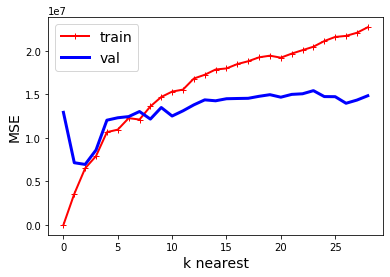

In [18]:
#results, errors, from the previous code to plot and see the train/val curve

plt.plot(knn_training_errors, "r-+", linewidth=2, label="train")# plotting the results
plt.plot(knn_validation_error, "b-", linewidth=3, label="val")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("k nearest", fontsize=14)
plt.ylabel("MSE", fontsize=14) #MSE

In [19]:
"""so the graph shows that with a 0 k value we get the perfect lowest train error and high valid error.
however after the k starts to increase, since we get close to overfitting, initially validation error gets decreased then starts 
to increase. so we decide that the best k in here is 2."""

'so the graph shows that with a 0 k value we get the perfect lowest train error and high valid error.\nhowever after the k starts to increase, since we get close to overfitting, initially validation error gets decreased then starts \nto increase. so we decide that the best k in here is 2.'

### b) Test your model:

In [20]:
best_knn = KNeighborsRegressor(n_neighbors=2)# best knn model

In [21]:
best_knn.fit(train_x_e , train_y)#train the best knn

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [22]:
knn_preds = best_knn.predict(test_x)#get the predicitons on test dataset.

In [23]:
knn_mse = mean_squared_error(test_y , knn_preds)# calculate and show mse for test predictions
print(knn_mse)

8111240.4390625


## DECISION TREE REGRESSOR TO PREDICT CAR PRICES

### c) Grid Search to find best model:

In [24]:
#decision tree grid search since parameter grid is fairly large. 
regressor = DecisionTreeRegressor(random_state=0)
param_grid = [{"max_depth" : [None, 1, 5, 10], "min_samples_split" : [0.01, 0.05, 0.1, 0.3], #parameters for grid search
              "max_features" : ["auto", "sqrt", "log2"], "max_leaf_nodes" : [10, 50, 100, 250]}]

In [25]:
decision_tree_grid = GridSearchCV(regressor, param_grid, cv=5, scoring = "neg_mean_squared_error") #implement grid search
#with a cross validation value 5 and neg mse as a scoring since it is a regression problem.

In [26]:
decision_tree_grid.fit(train_x_e , train_y) #fit to the train data

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=0,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [None, 1, 5, 10],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'max_leaf_nodes': [10, 50, 100, 250],
                          

In [27]:
decision_tree_grid.best_params_ #best parameters of the search

{'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': 50,
 'min_samples_split': 0.1}

In [28]:
abs(decision_tree_grid.best_score_) #best absolute mse error

11321462.259990446

### d) Test your model:

In [29]:
#test the best model with the best parameters
best_tree = DecisionTreeRegressor(random_state=0, max_depth = None, max_features = "auto",
                                 max_leaf_nodes = 50, min_samples_split = 0.1)

In [30]:
best_tree.fit(train_x_e, train_y) #fit train dataset to the best model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=50, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=0.1, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [31]:
tree_preds = best_tree.predict(test_x) #get the predicitons on test dataset

In [32]:
tree_mse = mean_squared_error(test_y , tree_preds) #get mse
print(tree_mse)

9779323.383824795


## ENSEMBLE BAGGING REGRESSOR TO PREDICT CAR PRICES

### e) Grid Search to find best model:

In [33]:
bag_reg = BaggingRegressor()#bagging regressor model
#parameter grid as multiple models with multiple parameters
p_grid = [{"base_estimator" : [LinearRegression(),KNeighborsRegressor(),DecisionTreeRegressor(random_state=0)],
            "n_estimators": [25, 50, 100, 250],
            "bootstrap_features" : [False, True],
            "random_state" : [0]}]

In [34]:
bag_grid = GridSearchCV(bag_reg, p_grid, cv=5, scoring = "neg_mean_squared_error")#grid search to find best params of ensemble bagging

In [35]:
bag_grid.fit(train_x_e , train_y) #fit train set to the instance

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'base_estimator': [LinearRegression(copy_X=True,
                                                              fit_int...
                                                                   min_impurity_decrease=0.0,
                                                                   min_impurity_split=None,
                                                                   min_samples_leaf=1,
                                                       

In [36]:
bag_grid.best_params_ #get the best parameters for the model

{'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=0, splitter='best'),
 'bootstrap_features': True,
 'n_estimators': 25,
 'random_state': 0}

In [37]:
abs(bag_grid.best_score_) #best score

7582764.783733706

### f) Test your model:

In [38]:
#re-create the regressor with the best params. found in above with grid search.
best_bag = BaggingRegressor(base_estimator = DecisionTreeRegressor(random_state = 0),bootstrap_features=True,
                           n_estimators = 25, random_state=0)

In [39]:
best_bag.fit(train_x_e , train_y) #fit to the regressor

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=0,
                                                      splitter='best'),
                 bootstrap=True, bootstrap_features=True, max_features=1.0,
                 max_samples=1.

In [40]:
bag_preds = best_bag.predict(test_x) #get preds.

In [41]:
bag_mse = mean_squared_error(test_y , bag_preds)#get mse
print(bag_mse)

5087171.418309701


## RANDOM FOREST REGRESSOR TO PREDICT CAR PRICES

### g) Grid Search to find best model:

In [42]:
#create an instance of random forest regressor and implement a grid search to find best parameters.
random_forest = RandomForestRegressor()
random_grid = [{"n_estimators" : [25, 50, 100, 250], "max_depth" : [1, 5, 10, None], "random_state" : [0]}]

In [43]:
random_forest_grid = GridSearchCV(random_forest, random_grid, cv=5, scoring = "neg_mean_squared_error")#grid search

In [44]:
random_forest_grid.fit(train_x_e, train_y)#fit to the grid to find best params.

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [1, 5, 10, None],

In [45]:
random_forest_grid.best_params_ #best parameters for the regressor

{'max_depth': None, 'n_estimators': 250, 'random_state': 0}

In [46]:
abs(random_forest_grid.best_score_) #best score mse

8868912.738594769

### h) Test your model:

In [47]:
#re-create the instance of the regressor with the best parameters found by grid search.
best_random_forest = RandomForestRegressor(max_depth = None , n_estimators=250, random_state =0)
best_random_forest.fit(train_x_e , train_y)#fit to the train data

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=250,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [48]:
random_forest_preds = best_random_forest.predict(test_x) #get preds

In [49]:
random_forest_mse = mean_squared_error(test_y , random_forest_preds)#get error on test dataset.
print(random_forest_mse)

4834633.740202937


### i) Feature Importances:

In [50]:
feats = {} # a dict to hold feature_name and importance
for feature, importance in zip(train_x_e.columns, best_random_forest.feature_importances_):
    feats[feature] = importance #name and value
feats_sorted = {k: v for k, v in sorted(feats.items(), key=lambda item: item[1], reverse = True)[:3]} 
#sort the features in order to get the most important feature easily

In [51]:
feats_dict = feats_sorted.items()#dictionary to tuple
feats_dict

dict_items([('enginesize', 0.6431907627725212), ('curbweight', 0.09927130122174944), ('highwaympg', 0.04157199697814074)])

In [52]:
top_3_rf_features = [i[0] for i in feats_dict] #get the top three most important features.
print(top_3_rf_features)

['enginesize', 'curbweight', 'highwaympg']
